# Evaluation

## IoU: Intersection over union  
<img src="./IoU.png"> 

In [1]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])
    
    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [2]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [4]:
GT = pd.read_csv('./groundtruth.csv',header=None)
GT = GT[0].str.split('\t', expand = True)
GT[0] = GT[0].astype(int)
GT[1] = GT[1].astype(int)
GT[2] = GT[2].astype(int)
GT[3] = GT[3].astype(int)
GT.head()

,0,1,2,3
0,213,121,21,95
1,213,119,21,95
2,211,119,21,95
3,210,116,21,95
4,209,115,21,95


In [5]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,213,121,234,216
1,213,119,234,214
2,211,119,232,214
3,210,116,231,211
4,209,115,230,210


In [6]:
csrt = pd.read_csv('./results/csrt.csv')
kcf = pd.read_csv('./results/kcf.csv')
boosting = pd.read_csv('./results/boosting.csv')
mil = pd.read_csv('./results/MIL.csv')
tld = pd.read_csv('./results/TLD.csv')
mf = pd.read_csv('./results/medianflow.csv')

In [7]:
kcf.head()

,x1,y1,x2,y2
0,213,121,234,216
1,212,119,233,214
2,210,118,231,213
3,208,118,229,213
4,207,117,228,212


In [8]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(597):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [9]:
miou = []
Rob = []

In [10]:
precision=[]
recall = []

### KCF Tracker

In [11]:
IoU_kcf = []
ol_kcf = []
count_kcf = 0
IoU_kcf,ol_kcf, count_kcf = evaluate(kcf)
time = [int(v) for v in range(597)]

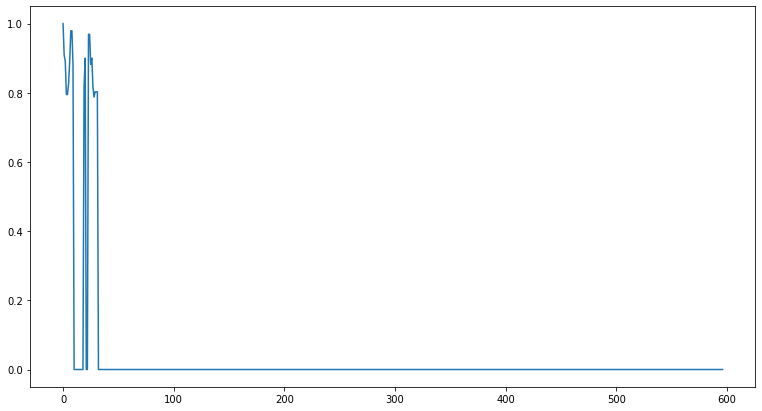

In [12]:
plt.figure(figsize=(13,7))
plt.plot(time, IoU_kcf)
plt.show()

In [13]:
rob = count_kcf / len(gt)
Rob.append(rob)
print('Robustness：',rob)
mIoU = sum(IoU_kcf) / len(gt)
miou.append(mIoU)
print('mIoU:',mIoU)

Robustness： 0.964824120603015
mIoU: 0.030820575091906728


In [14]:
kcf.shape

(597, 4)

In [15]:
TP = []
FP = []
for i in range(597):
    if IoU_kcf[i] > 0.5:
        TP.append(IoU_kcf[i])
    
    elif IoU_kcf[i] < 0.5:
        FP.append(IoU_kcf[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_kcf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.035175879396984924
Precision： 1.0


In [16]:
pre_kcf = []

In [17]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_kcf[i] > j:
            TP.append(IoU_kcf[i])
        elif IoU_kcf[i] < j:
            FP.append(IoU_kcf[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_kcf))*100
    print('Precision：', Precision)
    pre_kcf.append(Precision)

Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.035175879396984924
Precision： 100.0
Recall： 0.03015075376884422
Precision： 85.71428571428571
Recall： 0.01340033500837521
Precision： 38.095238095238095
Recall： 0.0
Precision： 0.0


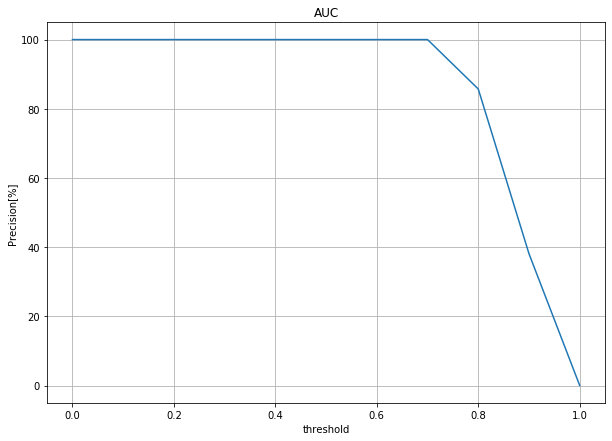

In [19]:
plt.figure(figsize=(10,7))
plt.plot(th, pre_kcf, antialiased=True)
plt.grid()
plt.title('AUC')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()

### CSRT Tracker

In [20]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(597)]

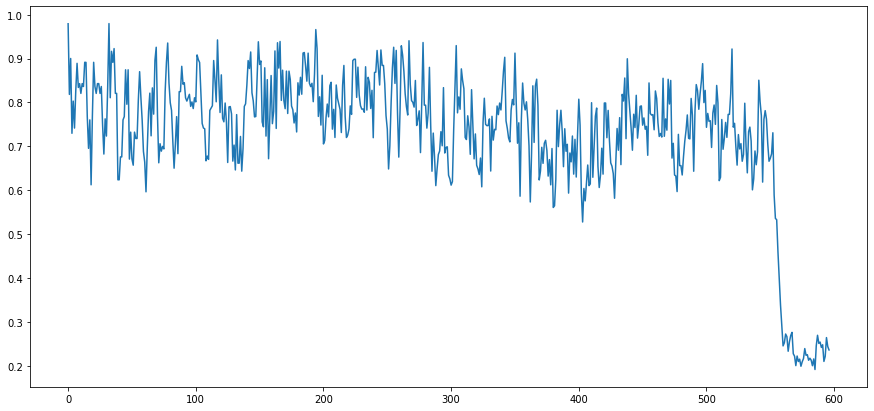

In [21]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_csrt)
plt.show()

In [22]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.7293794658315841


In [23]:
TP = []
FP = []
for i in range(597):
    if IoU_csrt[i] > 0.5:
        TP.append(IoU_csrt[i])
    
    elif IoU_csrt[i] < 0.5:
        FP.append(IoU_csrt[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_csrt)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.931323283082077
Precision： 0.931323283082077


In [24]:
pre_csrt = []

In [25]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_csrt[i] > j:
            TP.append(IoU_csrt[i])
        elif IoU_csrt[i] < j:
            FP.append(IoU_csrt[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_csrt))*100
    print('Precision：', Precision)
    pre_csrt.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9966499162479062
Precision： 99.66499162479062
Recall： 0.9363484087102177
Precision： 93.63484087102178
Recall： 0.932998324958124
Precision： 93.2998324958124
Recall： 0.931323283082077
Precision： 93.1323283082077
Recall： 0.9078726968174204
Precision： 90.78726968174205
Recall： 0.7068676716917923
Precision： 70.68676716917923
Recall： 0.3165829145728643
Precision： 31.65829145728643
Recall： 0.051926298157453935
Precision： 5.192629815745393
Recall： 0.0
Precision： 0.0


### Boosting Tracker

In [26]:
IoU_b = []
ol_b = []
count_b = 0
IoU_b,ol_b, count_b = evaluate(boosting)

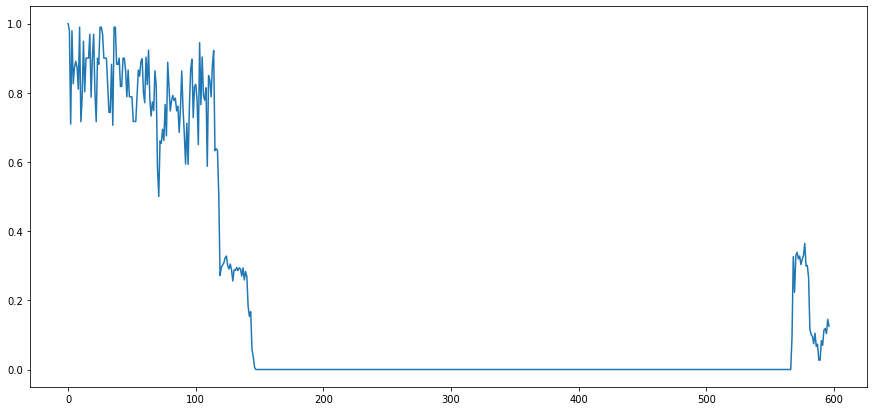

In [27]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_b)
plt.show()

In [28]:
rob = count_b / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_b) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.7035175879396985
mIoU: 0.18224550963658684


In [29]:
TP = []
FP = []
for i in range(597):
    if IoU_b[i] > 0.5:
        TP.append(IoU_b[i])
    
    elif IoU_b[i] < 0.5:
        FP.append(IoU_b[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_b)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.19765494137353434
Precision： 0.6666666666666666


In [30]:
pre_b = []

In [31]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_b[i] > j:
            TP.append(IoU_b[i])
        elif IoU_b[i] < j:
            FP.append(IoU_b[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_b))*100
    print('Precision：', Precision)
    pre_b.append(Precision)

Recall： 0.2964824120603015
Precision： 100.0
Recall： 0.27638190954773867
Precision： 93.22033898305084
Recall： 0.25795644891122277
Precision： 87.00564971751412
Recall： 0.22613065326633167
Precision： 76.27118644067797
Recall： 0.19932998324958123
Precision： 67.2316384180791
Recall： 0.19765494137353434
Precision： 66.66666666666666
Recall： 0.18927973199329984
Precision： 63.84180790960452
Recall： 0.1708542713567839
Precision： 57.6271186440678
Recall： 0.10552763819095477
Precision： 35.59322033898305
Recall： 0.04690117252931323
Precision： 15.819209039548024
Recall： 0.0
Precision： 0.0


### Median flow Tracker

In [32]:
IoU_mf = []
ol_mf = []
count_mf = 0
IoU_mf,ol_mf, count_mf = evaluate(mf)

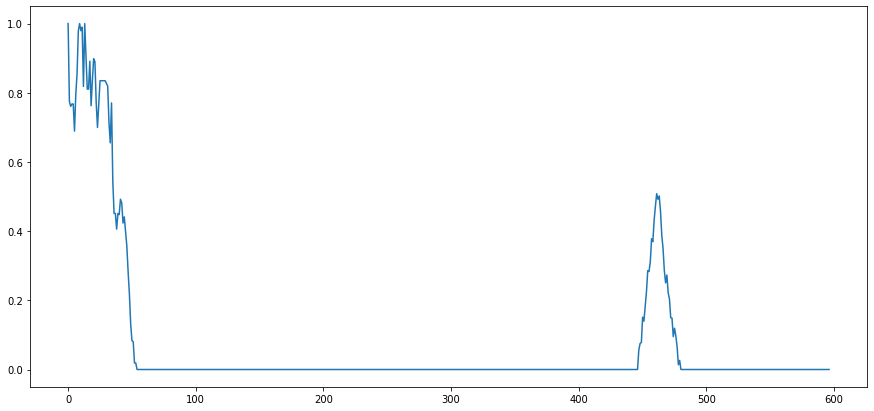

In [33]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mf)
plt.show()

In [34]:
rob = count_mf / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mf) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.8542713567839196
mIoU: 0.0727691573342012


In [35]:
TP = []
FP = []
for i in range(597):
    if IoU_mf[i] > 0.5:
        TP.append(IoU_mf[i])
    
    elif IoU_mf[i] < 0.5:
        FP.append(IoU_mf[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_mf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.06365159128978225
Precision： 0.4367816091954023


In [36]:
pre_mf = []

In [37]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_mf[i] > j:
            TP.append(IoU_mf[i])
        elif IoU_mf[i] < j:
            FP.append(IoU_mf[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_mf))*100
    print('Precision：', Precision)
    pre_mf.append(Precision)

Recall： 0.1457286432160804
Precision： 100.0
Recall： 0.12562814070351758
Precision： 86.20689655172413
Recall： 0.11390284757118928
Precision： 78.16091954022988
Recall： 0.09715242881072027
Precision： 66.66666666666666
Recall： 0.08542713567839195
Precision： 58.620689655172406
Recall： 0.06365159128978225
Precision： 43.67816091954023
Recall： 0.05862646566164154
Precision： 40.229885057471265
Recall： 0.05360134003350084
Precision： 36.7816091954023
Recall： 0.03685092127303183
Precision： 25.287356321839084
Recall： 0.011725293132328308
Precision： 8.045977011494253
Recall： 0.0
Precision： 0.0


### MIL Tracker

In [38]:
IoU_mil = []
ol_mil = []
count_mil = 0
IoU_mil,ol_mil, count_mil = evaluate(mil)

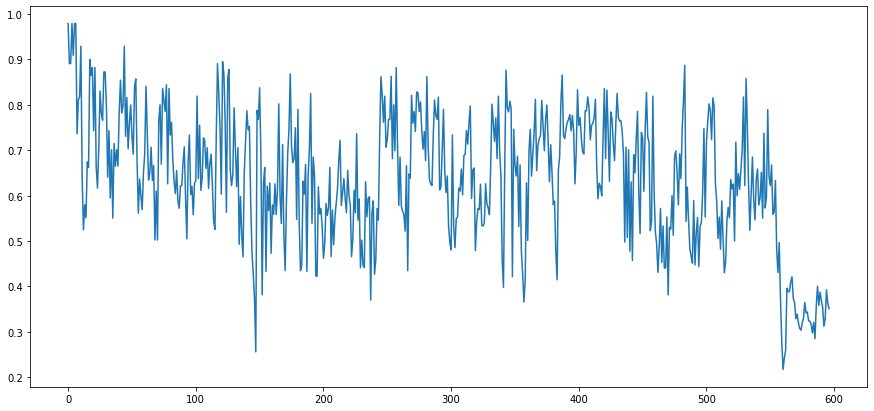

In [39]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mil)
plt.show()

In [40]:
rob = count_mil / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mil) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.6369020973318186


In [41]:
TP = []
FP = []
for i in range(597):
    if IoU_mil[i] > 0.5:
        TP.append(IoU_mil[i])
    
    elif IoU_mil[i] < 0.5:
        FP.append(IoU_mil[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_mil)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.830820770519263
Precision： 0.830820770519263


In [42]:
pre_mil = []

In [43]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_mil[i] > j:
            TP.append(IoU_mil[i])
        elif IoU_mil[i] < j:
            FP.append(IoU_mil[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_mil))*100
    print('Precision：', Precision)
    pre_mil.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9882747068676717
Precision： 98.82747068676717
Recall： 0.9279731993299832
Precision： 92.79731993299832
Recall： 0.830820770519263
Precision： 83.08207705192629
Recall： 0.626465661641541
Precision： 62.6465661641541
Recall： 0.36180904522613067
Precision： 36.18090452261307
Recall： 0.12562814070351758
Precision： 12.562814070351758
Recall： 0.01340033500837521
Precision： 1.340033500837521
Recall： 0.0
Precision： 0.0


### TLD Tracker 

In [44]:
IoU_tld = []
ol_tld = []
count_tld = 0
IoU_tld,ol_tld, count_tld = evaluate(tld)

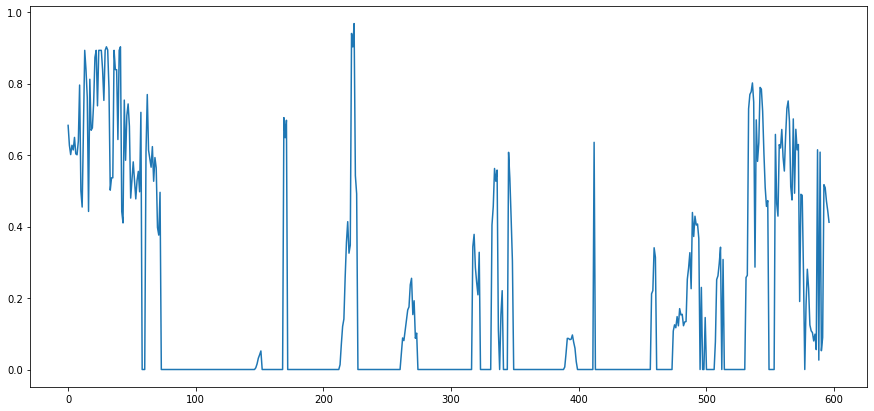

In [45]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_tld)
plt.show()

In [46]:
rob = count_tld / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_tld) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.6197654941373534
mIoU: 0.16983354264258765


In [47]:
TP = []
FP = []
for i in range(597):
    if IoU_tld[i] > 0.5:
        TP.append(IoU_tld[i])
    
    elif IoU_tld[i] < 0.5:
        FP.append(IoU_tld[i])     
        
Recall = len(TP) / (597)
print('Recall：',Recall)
Precision = len(TP) / (597-count_tld)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.17420435510887772
Precision： 0.4581497797356828


In [51]:
pre_tld = []

In [52]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_tld[i] > j:
            TP.append(IoU_tld[i])
        elif IoU_tld[i] < j:
            FP.append(IoU_tld[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_tld))*100
    print('Precision：', Precision)
    pre_tld.append(Precision)

Recall： 0.38023450586264657
Precision： 100.0
Recall： 0.3333333333333333
Precision： 87.66519823788546
Recall： 0.2864321608040201
Precision： 75.33039647577093
Recall： 0.24958123953098826
Precision： 65.63876651982379
Recall： 0.22278056951423786
Precision： 58.590308370044056
Recall： 0.17420435510887772
Precision： 45.81497797356828
Recall： 0.1306532663316583
Precision： 34.36123348017621
Recall： 0.07202680067001675
Precision： 18.94273127753304
Recall： 0.035175879396984924
Precision： 9.251101321585903
Recall： 0.008375209380234505
Precision： 2.2026431718061676
Recall： 0.0
Precision： 0.0


## Result

$$
{Precision =  \frac{正しく(IoU > 0.5)で検出できた数}{全てのPredicted BBoxの数}}
$$

$$
{Recall =  \frac{正しく(IoU > 0.5)で検出できた数}{全てのGT BBoxの数}}
$$

$$
{Robustness = \frac{追跡失敗した回数(overlap=0)}{frame数}}
$$

In [53]:
tracker = ['kcf','csrt','boosting','medianflow','mil','tld']
result = pd.DataFrame()
result = result.assign(Tracker=tracker)
result = result.assign(Robustness = Rob)
result = result.assign(mIoU = miou)
result = result.assign(Recall = recall)
result = result.assign(Precision= precision)
result = result[['Tracker','mIoU', 'Robustness','Recall','Precision']]
result

,Tracker,mIoU,Robustness,Recall,Precision
0,kcf,0.030821,0.964824,0.035176,1.000000
1,csrt,0.729379,0.000000,0.931323,0.931323
2,boosting,0.182246,0.703518,0.197655,0.666667
3,medianflow,0.072769,0.854271,0.063652,0.436782
4,mil,0.636902,0.000000,0.830821,0.830821
5,tld,0.169834,0.619765,0.174204,0.458150


### AUC（area under curve）：  
正解とみなす overlap の threshold を変化させてできる precision の変化をプロットした際の曲線の下側の面積（area under curve）。

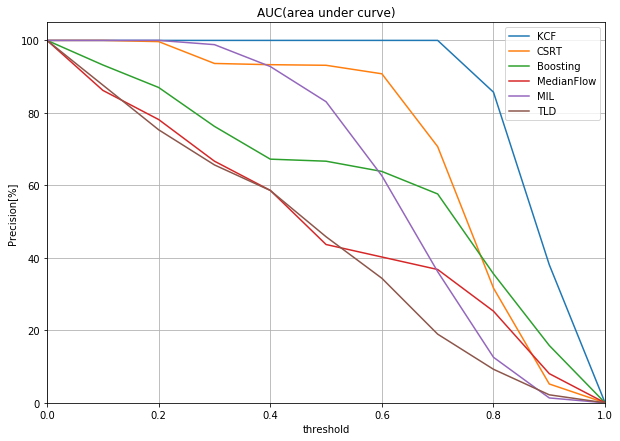

In [62]:
plt.figure(figsize=(10,7))
p1 = plt.plot(th, pre_kcf, antialiased=True)
p2 = plt.plot(th, pre_csrt, antialiased=True)
p3 = plt.plot(th, pre_b, antialiased=True)
p4 = plt.plot(th, pre_mf, antialiased=True)
p5 = plt.plot(th, pre_mil, antialiased=True)
p6 = plt.plot(th, pre_tld, antialiased=True)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]), ("KCF","CSRT","Boosting","MedianFlow","MIL","TLD"))
plt.grid()
plt.xlim(0.0, 1.0)
plt.ylim(0, 105)
plt.title('AUC(area under curve)')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()